# Exercício 06: Estimação de Densidades utilizando Misturas Gaussianas

#### Aluno: Giovanni Martins de Sá Júnior - 2017001850

Neste sexto exercício, será aplicado uma mistura de Gaussianas para alimentar um classificador de Bayes para um problema de classificação. A partir disso, será utilizado o pacote $mlbench$ para a geração dos conjuntos de dados, e então, realizar a classificação.

In [2]:
# Importacao das Bibliotecas
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import silhouette_score

In [3]:
# Passo 1: Carregamento do Dados
np.random.seed(0)
n_samples = 1000
X = np.concatenate([np.random.randn(n_samples, 2), 2 * np.random.randn(n_samples, 2) + [5, 5]])

# Rótulos para os dados sintéticos (vamos considerar 2 classes)
y = np.array([0] * n_samples + [1] * n_samples)

In [4]:
X

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       ...,
       [ 5.78989638,  3.99222022],
       [ 8.55911817,  4.93885511],
       [ 8.15417642,  3.3743958 ]])

In [5]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
# Passo 2: Treinar o Modelo de Misturas de Gaussianas e determinar o melhor numero de gaussianas
best_gmm = None
best_num_components = 0
best_silhouette_score = -1

for num_components in range(2, 31):
    gmm = GaussianMixture(n_components = num_components, random_state = 0)
    gmm.fit(X)

    # Avaliacao do Modelo usando o coeficiente da silhueta
    labels = gmm.predict(X)
    silhouette_avg = silhouette_score(X, labels)
    print("Num of components: ", num_components, "\t Silhouette Average: ", silhouette_avg)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_components = num_components
        best_gmm = gmm

print("Melhor número de Gaussianas: ", best_num_components)

Num of components:  2 	 Silhouette Average:  0.6322654083827831
Num of components:  3 	 Silhouette Average:  0.5318391927060195
Num of components:  4 	 Silhouette Average:  0.5239916246462194
Num of components:  5 	 Silhouette Average:  0.495127213227095
Num of components:  6 	 Silhouette Average:  0.3193596674931307
Num of components:  7 	 Silhouette Average:  0.31093505746498823
Num of components:  8 	 Silhouette Average:  0.3147886394061708
Num of components:  9 	 Silhouette Average:  0.31421002124050174
Num of components:  10 	 Silhouette Average:  0.3245034325855395
Num of components:  11 	 Silhouette Average:  0.319774622047423
Num of components:  12 	 Silhouette Average:  0.32237343342331
Num of components:  13 	 Silhouette Average:  0.31640668243101017
Num of components:  14 	 Silhouette Average:  0.3094412364342079
Num of components:  15 	 Silhouette Average:  0.30914970708536804
Num of components:  16 	 Silhouette Average:  0.31474693833929523
Num of components:  17 	 Silhoue

In [7]:
# Passos 3 e 4: Treinamento do modelo de misturas de Gaussiana e resolução do Modelo de Classificação 
num_folds = 10
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=0)

train_scores = []
test_scores = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinamento com a Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    train_score = gnb.score(X_train, y_train)
    test_score = accuracy_score(y_test, y_pred)

    train_scores.append(train_score)
    test_scores.append(test_score)

# Passo 5: Geração das Tabelas de Acurácias
print("Tabela de Acurácias de Treinamento: \n", train_scores, "\n")
print("Tabela de Acurácias de Teste", test_scores, "\n")

Tabela de Acurácias de Treinamento: 
 [0.9922222222222222, 0.9922222222222222, 0.9927777777777778, 0.9933333333333333, 0.9927777777777778, 0.9944444444444445, 0.9944444444444445, 0.9944444444444445, 0.9927777777777778, 0.9927777777777778] 

Tabela de Acurácias de Teste [0.99, 1.0, 1.0, 0.995, 1.0, 0.985, 0.985, 0.985, 1.0, 0.99] 



In [10]:
# Passo 6: Calcule as métricas resumidas
mean_train_score = statistics.mean(train_scores)
mean_test_score = statistics.mean(test_scores)
std_deviation = statistics.stdev(test_scores)

print("Media Pontuação Treinamento: ", mean_train_score, "\n")
print("Media Pontuação Teste: ", mean_test_score, "\n")
print("Desvio Padrão: ", std_deviation, "\n")

Media Pontuação Treinamento:  0.9932222222222222 

Media Pontuação Teste:  0.993 

Desvio Padrão:  0.006749485577105535 



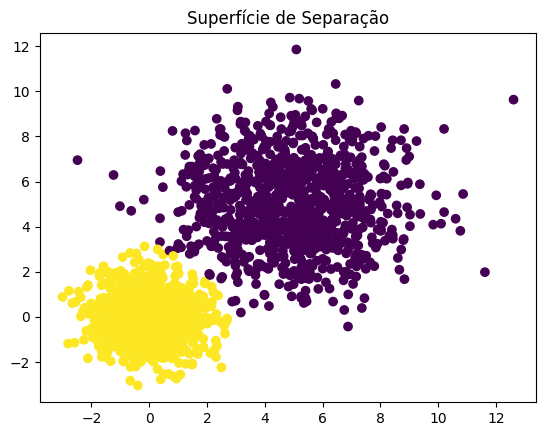

In [9]:
# Passo 7: Plote a superfície de separação para o treinamento com a melhor acurácia
labels = best_gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Superfície de Separação")
plt.show()